# About the Company

Bellabeat is a high-tech manufacturer of health-focused smart products targeted at women. They have been gaining popularity as a tech-driven wellness company and aims to further its success by seeking new opportunities for growth.

# 1. Ask Phase

**Business Task**

Bellabeat plans to analyse data on how non-Bellabeat users utilise their existing smart devices, specifically FitBit Fitness Tracker users. The insights identified will aid in informing and enhancing Bellabeat's marketing strategy for one of its products: **the Bellabeat application**.

**Analysis Questions**

1.  What are some trends in smart device usage?
2.  How could these trends apply to Bellabeat's customers?
3.  How could these trends help influence Bellabeat's marketing strategy?

# 2. Prepare Phase

**About the Dataset**

The FitBit Fitness Tracker Data, made available by Mobius (CC0: Public Domain), on Kaggle was examined in the present analysis. This dataset was collected from a survey conducted on Amazon Mechanical Turk from 03.12.2016 to 05.12.2016 and includes data from thirty Fitbit users who consented to share minute-level information on personal tracker data - physical activity, heart rate and sleep monitoring.

**Data Credibility**

The dataset is referenced but no longer up-to-date, with its last update occurring three years ago. The data is not original as it has been pre-processed and the dataset has limitations such as a relatively small sample size and lack of demographic information.

# 3. Process Phase

## 3.1. Installing and Loading Packages

The following packages will be used in the analysis:

In [1]:
# Loading packages
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## 3.2. Importing Datasets

As the present analysis focuses on daily and hourly data, the following datasets from the FitBit Fitness Tracker Data will be used: Daily Activity, Daily Sleep, Hourly Calories, Hourly Intensities and Hourly Steps.

In [2]:
# Importing datasets
daily_active <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

## 3.3. Cleaning and Formatting

### Missing and Duplicate Data

The first step in cleaning the data is to check if there are any missing and/or duplicate data.

In [3]:
# Identify missing data
sum(is.na(daily_active))
sum(is.na(sleep_day))
sum(is.na(hourly_calories))
sum(is.na(hourly_intensities))
sum(is.na(hourly_steps))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

No missing data is present in the datasets.

In [4]:
# Identify duplicate data
sum(duplicated(daily_active))
sum(duplicated(sleep_day))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

There are 3 duplicates in "sleep_day" dataset. There are no duplicates in the other datasets.

In [5]:
# Remove duplicates
sleep_day <- sleep_day %>%
  distinct() %>%
  drop_na()

sum(duplicated(sleep_day))

[1] 0

The 3 duplicates from "sleep_day" are removed.

### Identifying Variables

Next, to preview and summarise the datasets, head() and str() functions are used.

In [6]:
# Previewing the datasets
head(daily_active)
head(sleep_day)
head(hourly_calories)
head(hourly_intensities)
head(hourly_steps)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


In [7]:
# Summarising the datasets
str(daily_active)
str(sleep_day)
str(hourly_calories)
str(hourly_intensities)
str(hourly_steps)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

The information below summarises the variables for each dataset:

daily_active: Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories

sleep_day: Id, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

hourly_calories: Id, ActivityHour, Calories

hourly_intensities: Id, ActivityHour, TotalIntensity, AverageIntensity

hourly_steps: Id, ActivityHour, StepTotal

### Participants and Observations

Now, I want to identify how many unique users are present and how many observations there are in each dataset.

In [8]:
# Number of users
n_unique(daily_active$Id)
n_unique(sleep_day$Id)
n_unique(hourly_calories$Id)
n_unique(hourly_intensities$Id)
n_unique(hourly_steps$Id)

[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

There are a total of 33 users in the "daily_active", "hourly_calories", "hourly_intensities" and "hourly_steps" datasets but only 24 users in the "sleep_day" dataset.

Findings that include data from "sleep_day" should be examined with caution as it may not be reliable due to the small sample size of less than 30, which is the recommended minimum sample size. 

In [9]:
# daily activity
nrow(daily_active)

# daily sleep
nrow(sleep_day)

# calories by hour
nrow(hourly_calories)

# intensities by hour
nrow(hourly_intensities)

# steps per hour
nrow(hourly_steps)

[1] 940

[1] 410

[1] 22099

[1] 22099

[1] 22099

For the number of observations in each dataset, daily activity has 940 observations while daily sleep has 410 observations. There are 22099 observations in each hourly dataset.

## Formatting Date and Time

In the datasets, except for "daily_active", date and time are combined in a single column. 

Below, date and time are formatted and separated into different columns before further cleaning.

In [10]:
# daily activity
daily_active$ActivityDate=as.POSIXct(daily_active$ActivityDate, format="%m/%d/%Y") 
daily_active$date <- format(daily_active$ActivityDate, format = "%m/%d/%y") 
head(daily_active)

# daily sleep
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p")
sleep_day$date <- format(sleep_day$SleepDay, format = "%m/%d/%y")
sleep_day$time <- format(sleep_day$SleepDay, format = "%H:%M")
head(sleep_day)

# calories by hour
hourly_calories$ActivityHour=as.POSIXct(hourly_calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
hourly_calories$date <- format(hourly_calories$ActivityHour, format = "%m/%d/%y")
hourly_calories$time <- format(hourly_calories$ActivityHour, format = "%H:%M")
head(hourly_calories)

# intensities by hour
hourly_intensities$ActivityHour=as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%y")
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M")
head(hourly_intensities)

# steps per hour
hourly_steps$ActivityHour=as.POSIXct(hourly_steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
hourly_steps$date <- format(hourly_steps$ActivityHour, format = "%m/%d/%y")
hourly_steps$time <- format(hourly_steps$ActivityHour, format = "%H:%M")
head(hourly_steps)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12,1,327,346,04/12/16,00:00
1503960366,2016-04-13,2,384,407,04/13/16,00:00
1503960366,2016-04-15,1,412,442,04/15/16,00:00
1503960366,2016-04-16,2,340,367,04/16/16,00:00
1503960366,2016-04-17,1,700,712,04/17/16,00:00
1503960366,2016-04-19,1,304,320,04/19/16,00:00


Id,ActivityHour,Calories,date,time
<dbl>,<dttm>,<dbl>,<chr>,<chr>
1503960366,2016-04-12 00:00:00,81,04/12/16,00:00
1503960366,2016-04-12 01:00:00,61,04/12/16,01:00
1503960366,2016-04-12 02:00:00,59,04/12/16,02:00
1503960366,2016-04-12 03:00:00,47,04/12/16,03:00
1503960366,2016-04-12 04:00:00,48,04/12/16,04:00
1503960366,2016-04-12 05:00:00,48,04/12/16,05:00


Id,ActivityHour,TotalIntensity,AverageIntensity,date,time
<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<chr>
1503960366,2016-04-12 00:00:00,20,0.333333,04/12/16,00:00
1503960366,2016-04-12 01:00:00,8,0.133333,04/12/16,01:00
1503960366,2016-04-12 02:00:00,7,0.116667,04/12/16,02:00
1503960366,2016-04-12 03:00:00,0,0.000000,04/12/16,03:00
1503960366,2016-04-12 04:00:00,0,0.000000,04/12/16,04:00
1503960366,2016-04-12 05:00:00,0,0.000000,04/12/16,05:00


Id,ActivityHour,StepTotal,date,time
<dbl>,<dttm>,<dbl>,<chr>,<chr>
1503960366,2016-04-12 00:00:00,373,04/12/16,00:00
1503960366,2016-04-12 01:00:00,160,04/12/16,01:00
1503960366,2016-04-12 02:00:00,151,04/12/16,02:00
1503960366,2016-04-12 03:00:00,0,04/12/16,03:00
1503960366,2016-04-12 04:00:00,0,04/12/16,04:00
1503960366,2016-04-12 05:00:00,0,04/12/16,05:00


Next, I will create a new column to include the day of the week and remove any redundant date columns.

In [11]:
# daily activity
daily_active2 <- daily_active %>% 
  mutate(activity_date = mdy(date)) %>% 
  rename("date_chr"="date", "date"="activity_date") %>% 
  mutate(day = weekdays(date)) %>% 
  select(-2,-16)
head(daily_active2)

# daily sleep
sleep_day2 <- sleep_day %>% 
  mutate(activity_date = mdy(date)) %>% 
  rename("date_chr"="date", "date"="activity_date") %>% 
  mutate(day = weekdays(date)) %>% 
  select(-2,-6)
head(sleep_day2)

# calories by hour
hourly_calories2 <- hourly_calories %>% 
  mutate(activity_date = mdy(date)) %>% 
  rename("date_chr"="date", "date"="activity_date") %>% 
  mutate(day = weekdays(date)) %>% 
  select(-2,-4)
head(hourly_calories2)

# intensities by hour
hourly_intensities2 <- hourly_intensities %>% 
  mutate(activity_date = mdy(date)) %>% 
  rename("date_chr"="date", "date"="activity_date") %>% 
  mutate(day = weekdays(date)) %>% 
  select(-2,-5)
head(hourly_intensities2)

# steps per hour
hourly_steps2 <- hourly_steps %>% 
  mutate(activity_date = mdy(date)) %>% 
  rename("date_chr"="date", "date"="activity_date") %>% 
  mutate(day = weekdays(date)) %>% 
  select(-2,-4)
head(hourly_steps2)

Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,day
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,Tuesday
1503960366,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,Wednesday
1503960366,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14,Thursday
1503960366,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,Friday
1503960366,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,Saturday
1503960366,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,Sunday


Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time,date,day
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>
1503960366,1,327,346,00:00,2016-04-12,Tuesday
1503960366,2,384,407,00:00,2016-04-13,Wednesday
1503960366,1,412,442,00:00,2016-04-15,Friday
1503960366,2,340,367,00:00,2016-04-16,Saturday
1503960366,1,700,712,00:00,2016-04-17,Sunday
1503960366,1,304,320,00:00,2016-04-19,Tuesday


Id,Calories,time,date,day
<dbl>,<dbl>,<chr>,<date>,<chr>
1503960366,81,00:00,2016-04-12,Tuesday
1503960366,61,01:00,2016-04-12,Tuesday
1503960366,59,02:00,2016-04-12,Tuesday
1503960366,47,03:00,2016-04-12,Tuesday
1503960366,48,04:00,2016-04-12,Tuesday
1503960366,48,05:00,2016-04-12,Tuesday


Id,TotalIntensity,AverageIntensity,time,date,day
<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>
1503960366,20,0.333333,00:00,2016-04-12,Tuesday
1503960366,8,0.133333,01:00,2016-04-12,Tuesday
1503960366,7,0.116667,02:00,2016-04-12,Tuesday
1503960366,0,0.000000,03:00,2016-04-12,Tuesday
1503960366,0,0.000000,04:00,2016-04-12,Tuesday
1503960366,0,0.000000,05:00,2016-04-12,Tuesday


Id,StepTotal,time,date,day
<dbl>,<dbl>,<chr>,<date>,<chr>
1503960366,373,00:00,2016-04-12,Tuesday
1503960366,160,01:00,2016-04-12,Tuesday
1503960366,151,02:00,2016-04-12,Tuesday
1503960366,0,03:00,2016-04-12,Tuesday
1503960366,0,04:00,2016-04-12,Tuesday
1503960366,0,05:00,2016-04-12,Tuesday


## Merging Datasets

As the focus of the present analysis is on daily and hourly data, two new datasets are created: "daily_activity" and "hourly_activity".

However, before merging the datasets, they should be further cleaned and formatted to improve readability and for easier viewing:

-   drop columns that are not of interest

-   reorder columns

-   clean variable names

### daily activity

In [12]:
# Clean daily activity data
daily_activity <- daily_active2 %>% 
  select(-c(4:9)) %>% 
  select(c(1, 9, 10, 8, 2, 3, 4, 5, 6, 7)) %>% 
  clean_names()
  
head(daily_activity)

id,date,day,calories,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,1985,13162,8.50,25,13,328,728
1503960366,2016-04-13,Wednesday,1797,10735,6.97,21,19,217,776
1503960366,2016-04-14,Thursday,1776,10460,6.74,30,11,181,1218
1503960366,2016-04-15,Friday,1745,9762,6.28,29,34,209,726
1503960366,2016-04-16,Saturday,1863,12669,8.16,36,10,221,773
1503960366,2016-04-17,Sunday,1728,9705,6.48,38,20,164,539


### daily sleep

In [13]:
# Clean daily sleep data
daily_sleep <- sleep_day2 %>% 
  select(c(1, 6, 7, 5, 2, 3, 4)) %>% 
  clean_names()

head(daily_sleep)

id,date,day,time,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,00:00,1,327,346
1503960366,2016-04-13,Wednesday,00:00,2,384,407
1503960366,2016-04-15,Friday,00:00,1,412,442
1503960366,2016-04-16,Saturday,00:00,2,340,367
1503960366,2016-04-17,Sunday,00:00,1,700,712
1503960366,2016-04-19,Tuesday,00:00,1,304,320


### hourly activity

In [14]:
# Drop and reorder columns for hourly calories, hourly intensities and hourly steps data
hourly_calories3 <- hourly_calories2 %>%
  select(c(1, 4, 5, 3, 2))
head(hourly_calories3)

hourly_intensities3 <- hourly_intensities2 %>% 
  select(c(1, 5, 6, 4, 2, 3))
head(hourly_intensities3)

hourly_steps3 <- hourly_steps2 %>% 
  select(c(1, 4, 5, 3, 2))
head(hourly_steps3)

Id,date,day,time,Calories
<dbl>,<date>,<chr>,<chr>,<dbl>
1503960366,2016-04-12,Tuesday,00:00,81
1503960366,2016-04-12,Tuesday,01:00,61
1503960366,2016-04-12,Tuesday,02:00,59
1503960366,2016-04-12,Tuesday,03:00,47
1503960366,2016-04-12,Tuesday,04:00,48
1503960366,2016-04-12,Tuesday,05:00,48


Id,date,day,time,TotalIntensity,AverageIntensity
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,00:00,20,0.333333
1503960366,2016-04-12,Tuesday,01:00,8,0.133333
1503960366,2016-04-12,Tuesday,02:00,7,0.116667
1503960366,2016-04-12,Tuesday,03:00,0,0.000000
1503960366,2016-04-12,Tuesday,04:00,0,0.000000
1503960366,2016-04-12,Tuesday,05:00,0,0.000000


Id,date,day,time,StepTotal
<dbl>,<date>,<chr>,<chr>,<dbl>
1503960366,2016-04-12,Tuesday,00:00,373
1503960366,2016-04-12,Tuesday,01:00,160
1503960366,2016-04-12,Tuesday,02:00,151
1503960366,2016-04-12,Tuesday,03:00,0
1503960366,2016-04-12,Tuesday,04:00,0
1503960366,2016-04-12,Tuesday,05:00,0


In [15]:
# Merge hourly calories, hourly intensities and hourly steps data
hourly_activity <- hourly_calories3 %>% 
  left_join(hourly_steps3, by = c("Id", "date", "day","time")) %>% 
  left_join(hourly_intensities3, by = c("Id", "date", "day","time")) %>% 
  clean_names() %>% 
  rename("hourly_steps"="step_total", "hourly_calories"="calories")

head(hourly_activity)

id,date,day,time,hourly_calories,hourly_steps,total_intensity,average_intensity
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,Tuesday,00:00,81,373,20,0.333333
1503960366,2016-04-12,Tuesday,01:00,61,160,8,0.133333
1503960366,2016-04-12,Tuesday,02:00,59,151,7,0.116667
1503960366,2016-04-12,Tuesday,03:00,47,0,0,0.000000
1503960366,2016-04-12,Tuesday,04:00,48,0,0,0.000000
1503960366,2016-04-12,Tuesday,05:00,48,0,0,0.000000


Now, let's reassess the overall user count.

In [16]:
# Number of users
n_unique(daily_activity$id)
n_unique(daily_sleep$id)
n_unique(hourly_activity$id)

[1] 33

[1] 24

[1] 33

In the daily activity and hourly activity datasets, there are 33 users, and in the daily sleep dataset, there are 24 users.

# 4. Analyse Phase

Main Question: What are some trends in smart device usage that can help shape the marketing strategy for other smart devices?

## 4.1. Preliminary Analysis

Let's first examine the activity levels of the users before exploring the summary statistics of the daily and hourly datasets.

### Activity Level of Users

Question: What is the distribution of activity levels among users?

Activity level here refers to the daily step count of an individual. According to the graduated step index, proposed by [Tudor-Locke and Bassett (2004)](https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79#), step count can be grouped into 5 categories:

-   sedentary: <5,000 steps per day

-   low active: 5,000 to 7,499 steps per day

-   somewhat active: 7,500 to 9,999 steps per day

-   active: ≥10,000 to 12,499 steps per day

-   highly active: ≥12,500 steps per day

Given the relatively small sample size of 33 users, it may not be feasible to categorise the sample into more representative activity level groups - individuals with the same activity levels - as this could result in very small sample sizes within each group. Assessing the activity levels of users within the present sample can help to determine whether the number of participants for each activity level is evenly distributed or skewed. An even distribution would allow for a more accurate representation of the sample without the need to further divide the sample into smaller groups.

Therefore, taking this approach helps to ensure that any findings from the data analysis would reflect the average results across the different activity levels.

The present analysis will focus on four categories from the graduated step index to determine the distribution of activity levels: sedentary, low active, somewhat active and active.

In [17]:
# Creating a data frame to summarise activity level of each user
avg_steps <- daily_activity %>% 
  group_by(id) %>% 
  summarise(mean_steps = mean(total_steps), .groups = "drop") %>% 
  mutate(active_level = case_when(
    mean_steps < 5000 ~ "sedentary",
    mean_steps >= 5000 & mean_steps < 7500 ~ "low active",
    mean_steps >= 7500 & mean_steps < 10000 ~ "somewhat active",
    mean_steps >= 10000 ~ "active"))
head(avg_steps)

# Calculating activity level distribution percentage
avg_steps_active <- avg_steps %>% 
  group_by(active_level) %>% 
  summarise(total_active = n()) %>% 
  mutate(percent_active = round(total_active/sum(total_active),2),
         percentage = scales::percent(percent_active))
head(avg_steps_active)

id,mean_steps,active_level
<dbl>,<dbl>,<chr>
1503960366,12116.742,active
1624580081,5743.903,low active
1644430081,7282.967,low active
1844505072,2580.065,sedentary
1927972279,916.129,sedentary
2022484408,11370.645,active


active_level,total_active,percent_active,percentage
<chr>,<int>,<dbl>,<chr>
active,7,0.21,21%
low active,9,0.27,27%
sedentary,8,0.24,24%
somewhat active,9,0.27,27%


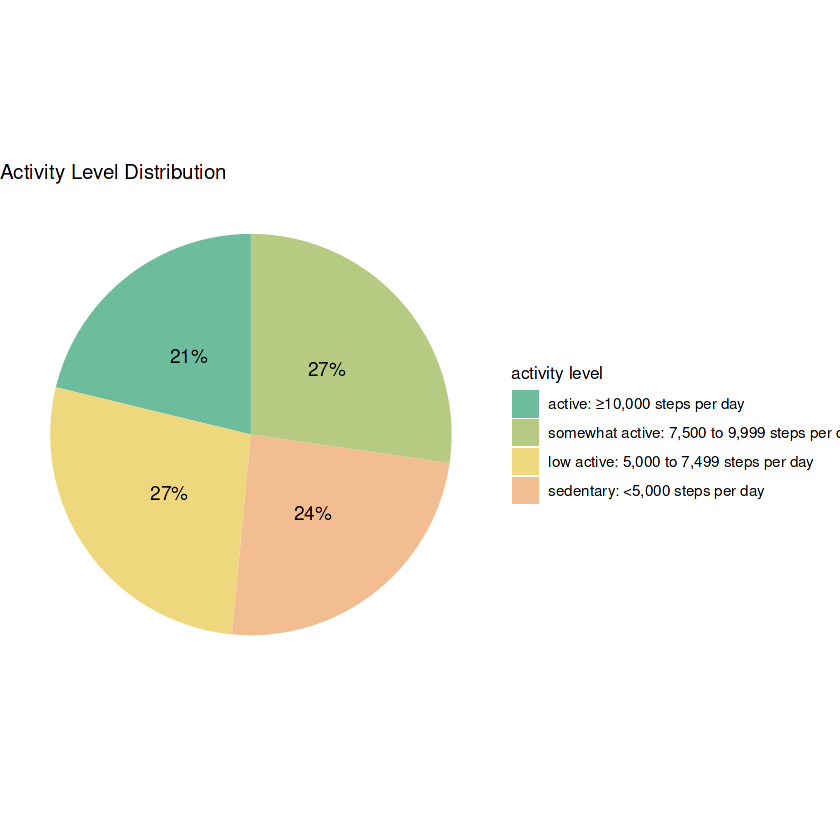

In [18]:
# Representing the 4 categories in a pie chart
ggplot(avg_steps_active, aes(x="", y= percent_active, fill=active_level)) +
  geom_bar(stat="identity", width=1) +
  geom_text(aes(label = percentage), 
            position = position_stack(vjust = 0.5)) +
  coord_polar("y", start=0) + 
  theme_void() +
  labs(title = "Activity Level Distribution", fill = "activity level") +
  theme(plot.title = element_text(size = 12), legend.title = element_text(size = 10)) +
  scale_fill_manual(values = c("sedentary"="#f2bd90", "low active"="#efd77e","somewhat active"="#b6cb81", "active" = "#6ebc9e"), 
                    limits = c("active", "somewhat active", "low active", "sedentary"),
                    labels = c("active: ≥10,000 steps per day",
                               "somewhat active: 7,500 to 9,999 steps per day",
                               "low active: 5,000 to 7,499 steps per day",
                               "sedentary: <5,000 steps per day"))

The pie chart illustrates that the number of participants in each activity level is nearly evenly distributed.

Based on this finding, it is reasonable to assume that the current sample is a reliable reflection of the average outcomes among the different activity levels. This understanding enables me to confidently progress with subsequent analyses without the need to categorise the sample into their respective activity levels.

Nonetheless, it is important to emphasise that the decision to not categorise users into their respective activity levels before conducting further analyses prevents comparisons between these groups. Results could potentially differ depending on activity level. This decision is primarily driven by the relatively small sample size of only 33 participants.

### Summary Statistics

The following is the summary statistics of the daily and hourly datasets.

In [19]:
# daily activity
daily_activity %>%  
  select(calories,
         total_steps,
         total_distance,
         very_active_minutes,
         fairly_active_minutes,
         lightly_active_minutes,
         sedentary_minutes) %>% 
  summary()

# daily sleep
daily_sleep %>% 
  select(total_sleep_records,
         total_minutes_asleep,
         total_time_in_bed) %>%
  summary()

# hourly activity
hourly_activity %>%  
  select(hourly_calories,
         hourly_steps,
         total_intensity,
         average_intensity) %>%
  summary()

    calories     total_steps    total_distance   very_active_minutes
 Min.   :   0   Min.   :    0   Min.   : 0.000   Min.   :  0.00     
 1st Qu.:1828   1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00     
 Median :2134   Median : 7406   Median : 5.245   Median :  4.00     
 Mean   :2304   Mean   : 7638   Mean   : 5.490   Mean   : 21.16     
 3rd Qu.:2793   3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00     
 Max.   :4900   Max.   :36019   Max.   :28.030   Max.   :210.00     
 fairly_active_minutes lightly_active_minutes sedentary_minutes
 Min.   :  0.00        Min.   :  0.0          Min.   :   0.0   
 1st Qu.:  0.00        1st Qu.:127.0          1st Qu.: 729.8   
 Median :  6.00        Median :199.0          Median :1057.5   
 Mean   : 13.56        Mean   :192.8          Mean   : 991.2   
 3rd Qu.: 19.00        3rd Qu.:264.0          3rd Qu.:1229.5   
 Max.   :143.00        Max.   :518.0          Max.   :1440.0   

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.00        Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.00        1st Qu.:361.0        1st Qu.:403.8    
 Median :1.00        Median :432.5        Median :463.0    
 Mean   :1.12        Mean   :419.2        Mean   :458.5    
 3rd Qu.:1.00        3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.00        Max.   :796.0        Max.   :961.0    

 hourly_calories   hourly_steps     total_intensity  average_intensity
 Min.   : 42.00   Min.   :    0.0   Min.   :  0.00   Min.   :0.0000   
 1st Qu.: 63.00   1st Qu.:    0.0   1st Qu.:  0.00   1st Qu.:0.0000   
 Median : 83.00   Median :   40.0   Median :  3.00   Median :0.0500   
 Mean   : 97.39   Mean   :  320.2   Mean   : 12.04   Mean   :0.2006   
 3rd Qu.:108.00   3rd Qu.:  357.0   3rd Qu.: 16.00   3rd Qu.:0.2667   
 Max.   :948.00   Max.   :10554.0   Max.   :180.00   Max.   :3.0000   

There are several notable observations. On average, participants:

-   walk 7638 steps per day

-   sleep for 419.2 minutes - approximately 7 hours

-   mostly lightly active (192.8 minutes), followed by very active (21.16 minutes) and fairly active (13.56 minutes)

## 4.2. Fitness Tracker Usage

Question: How often do users use their smart devices?

In order to measure device usage, I will categorise the total number of observations - number of days the device was used - for each user during the 31-day period into three categories:

-   high usage: 22 to 31 days

-   moderate usage: 12 to 21 days

-   low usage: 1 to 11 days

In [20]:
# Creating a data frame to summarise number of observations for each user
n_obs_usage <- daily_activity %>% 
  group_by(id) %>% 
  summarise(n_obs = sum(n()), .groups = "drop") %>% 
  mutate(usage = case_when(
    between(n_obs, 1, 11) ~ "low usage",
    between(n_obs, 12, 21) ~ "moderate usage",
    between(n_obs, 22, 31) ~ "high usage"))
head(n_obs_usage)

# Calculating usage level percentage
n_usage <- n_obs_usage %>% 
  group_by(usage) %>% 
  summarise(total_usage = n()) %>% 
  mutate(percent_usage = round(total_usage/sum(total_usage),2),
         percentage = scales::percent(percent_usage))
head(n_usage)

id,n_obs,usage
<dbl>,<int>,<chr>
1503960366,31,high usage
1624580081,31,high usage
1644430081,30,high usage
1844505072,31,high usage
1927972279,31,high usage
2022484408,31,high usage


usage,total_usage,percent_usage,percentage
<chr>,<int>,<dbl>,<chr>
high usage,29,0.88,88%
low usage,1,0.03,3%
moderate usage,3,0.09,9%


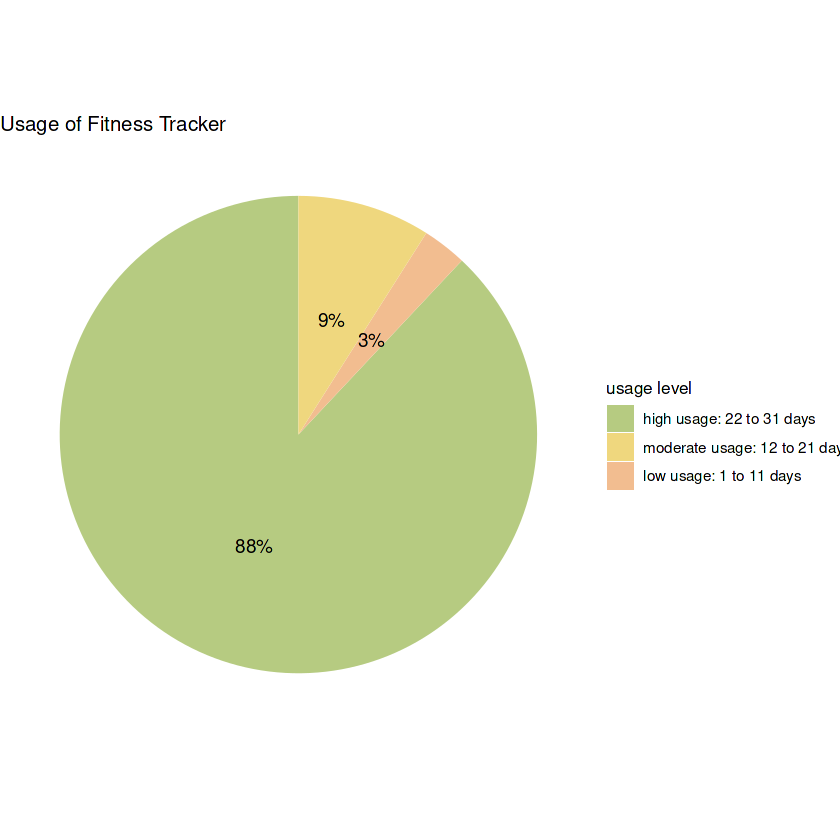

In [21]:
# Representing the 3 categories in a pie chart
ggplot(n_usage, aes(x="", y= percent_usage, fill=usage)) +
  geom_bar(stat="identity", width=1) +
  geom_text(aes(label = percentage), 
            position = position_stack(vjust = 0.5)) +
  coord_polar("y", start=0) + 
  theme_void() +
  labs(title = "Usage of Fitness Tracker", fill = "usage level") +
  theme(plot.title = element_text(size = 12), legend.title = element_text(size = 10)) +
  scale_fill_manual(values = c("low usage"="#f2bd90", "moderate usage"="#efd77e","high usage"="#b6cb81"), 
                    limits = c("high usage", "moderate usage", "low usage"),
                    labels = c("high usage: 22 to 31 days",
                               "moderate usage: 12 to 21 days",
                               "low usage: 1 to 11 days"))

The pie chart shows that out of the 33 participants during the 31-day period:

-   88% (29 users) used their fitness tracker regularly

-   9% (3 users) used their fitness tracker infrequently

-   3% (1 users) used their fitness tracker rarely

This indicates that the majority of users actively used their fitness tracker throughout the 31 days.

## 4.3. Step Count

Question: What is the relationship between step count, calories and sedentary minutes?

To assess the influence of step count on both caloric expenditure and sedentary minutes, I will analyse the correlations between these variables.

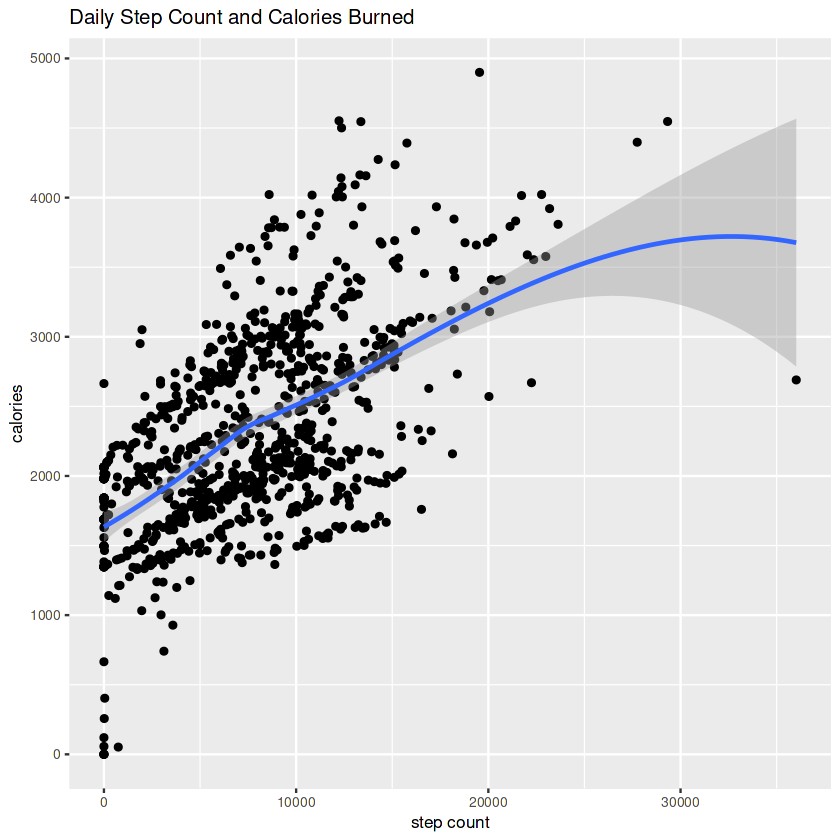

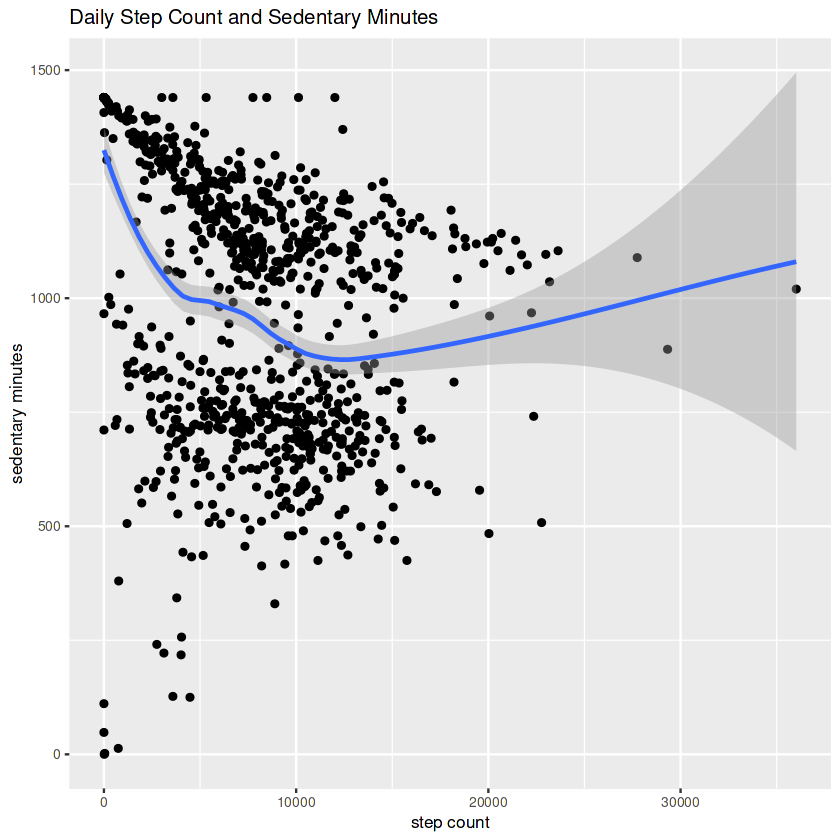

In [22]:
# Correlating total daily steps with calories burned and total daily steps with sedentary minutes
ggplot(data = daily_activity, aes(x = total_steps, y = calories)) +      
  geom_point() +
  geom_smooth(method = "loess", formula = "y ~ x") +
  labs(x = "step count", y = "calories", title = "Daily Step Count and Calories Burned") +
  theme(axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8),
      axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10),
      plot.title = element_text(size = 12))

ggplot(data=daily_activity, aes(x=total_steps, y=sedentary_minutes)) +     
  geom_point() +
  geom_smooth(method = "loess", formula = "y ~ x") +
  labs(x = "step count", y = "sedentary minutes", title = "Daily Step Count and Sedentary Minutes") +
theme(axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8),
      axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10),
      plot.title = element_text(size = 12))

From the scatter plots and trend lines, we can see that:

-   there is a positive correlation between step count and calories burned, suggesting that higher total daily step count may result in more calories being burned.

-   there is a negative correlation between step count and sedentary minutes, suggesting that higher total daily step count could lead to a decrease in sedentary minutes.

Given that step count is positively correlated with calories burned and negatively correlated with sedentary minutes, these suggest that engaging in more physical activity, such as walking, may be associated with both higher calorie expenditure and reduced sedentary lifestyle.

As step count has demonstrated to have an affect on these variables, the next step would be to conduct a more detailed analysis on step count. To do this, I will first analyse step count by day of the week and subsequently analyse hourly step count by day of the week.

day,average_daily_steps
<fct>,<dbl>
Monday,7780.867
Tuesday,8125.007
Wednesday,7559.373
Thursday,7405.837
Friday,7448.230
Saturday,8152.976


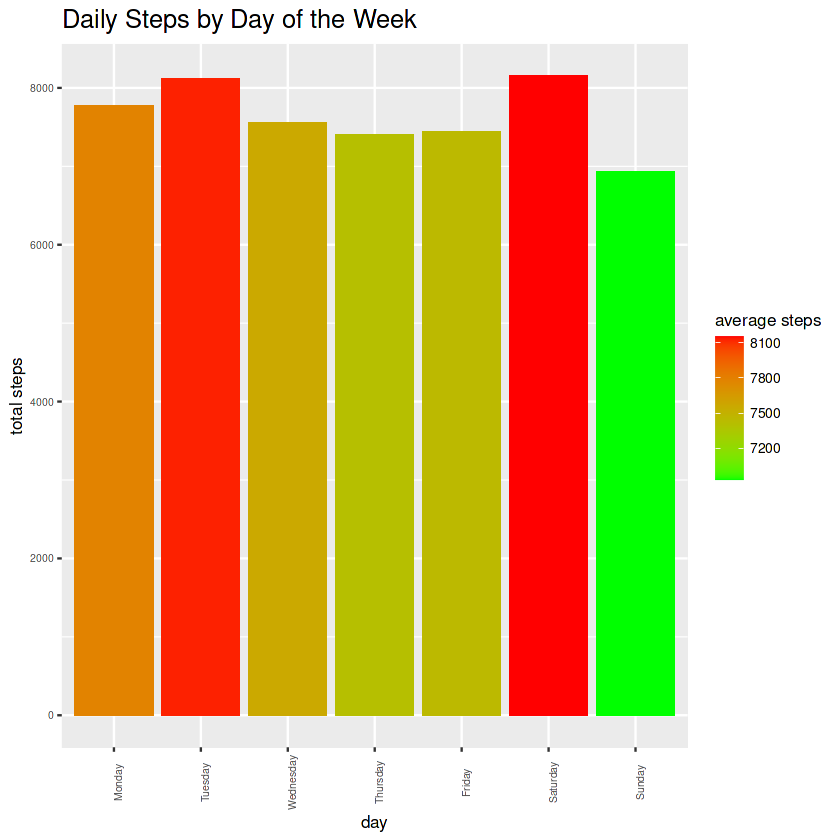

In [23]:
# Creating a data frame to summarise step count by day of the week 
daily_steps <- daily_activity %>% 
  mutate(day = factor(day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>% 
  group_by(day) %>% 
  summarise(average_daily_steps = mean(total_steps), .groups = "drop")
head(daily_steps)

# Plotting the data using a column chart
ggplot(data = daily_steps) + 
  geom_col(mapping = aes(x = day, y = average_daily_steps, fill = average_daily_steps)) +
  scale_fill_gradient(low = "green", high = "red") +
  labs(x = "day", y = "total steps", title = "Daily Steps by Day of the Week", fill = "average steps") + 
  theme(axis.text.x = element_text(angle = 90)) +
  theme(axis.text.x = element_text(size = 6), axis.text.y = element_text(size = 6), legend.text = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10), legend.title = element_text(size = 10),
        plot.title = element_text(size = 15))

Here we can see that step count varied depending on the day of the week. On average, the highest step counts occur on Tuesdays and Saturdays, and the lowest step counts on Sundays.

A possible explanation for the lower step count on Sundays could be attributed to the notion that Sundays are typically considered as a day of rest. Consequently, individuals may choose to engage in less movement on this day.

time,day,average_steps
<chr>,<fct>,<dbl>
00:00,Monday,30.00833
00:00,Tuesday,28.34667
00:00,Wednesday,31.22148
00:00,Thursday,31.28276
00:00,Friday,44.27778
00:00,Saturday,55.20325


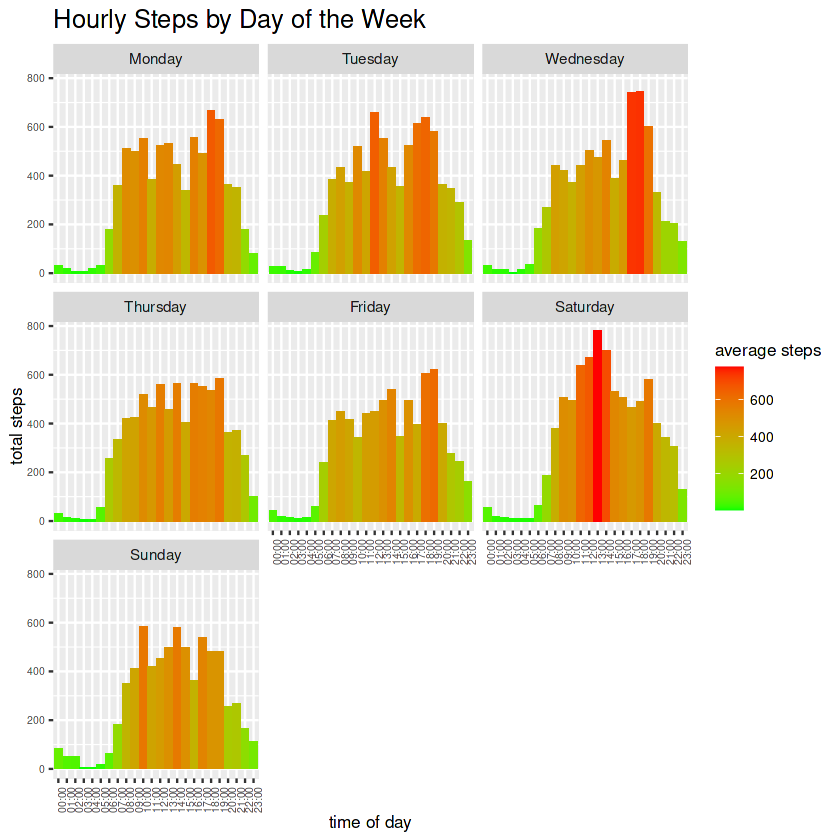

In [24]:
# Creating a data frame to summarise hourly step count by day of the week 
steps_week <- hourly_activity %>% 
  mutate(day = factor(day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>% 
  group_by(time, day) %>% 
  summarise(average_steps = mean(hourly_steps), .groups = "drop")
head(steps_week)

# Plotting the data using a column chart
ggplot(data = steps_week) + 
  geom_col(mapping = aes(x = time, y = average_steps, fill = average_steps)) +
  facet_wrap(~day) +
  scale_fill_gradient(low = "green", high = "red") +
  labs(x = "time of day", y = "total steps", title = "Hourly Steps by Day of the Week", fill = "average steps") + 
  theme(axis.text.x = element_text(angle = 90)) +
  theme(axis.text.x = element_text(size = 6), axis.text.y = element_text(size = 6), legend.text = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10), legend.title = element_text(size = 10),
        plot.title = element_text(size = 15))

Overall, the hourly pattern for step count across the week is relatively consistent, where steps tend to be recorded between 6:00 and 00:00 on weekdays, and 7:00 and 00:00 on weekends. The one hour difference from 6:00 on weekdays to 7:00 on weekends could be that participants may choose to sleep an hour more on weekends as they are not required to work.

Furthermore, on weekdays, a greater number of steps are recorded between 17:00 to 20:00, particularly between 17:00 to 19:00 on Wednesdays. While on weekends, more steps are recorded between 12:00 and 15:00 on Saturdays.

These trends suggest that on weekdays, individuals seem to prefer early evening, likely after their office hours, to incorporate some physical activity.

Whereas on weekends, they prefer Saturdays, particularly early afternoon, to engage in physical activity. This could perhaps be due to having more leisure and free time during the day, allowing for active recreational opportunities, which may also explain why the highest step counts occur during this time frame.

time,day,average_intensity_w
<chr>,<fct>,<dbl>
00:00,Monday,1.625000
00:00,Tuesday,1.393333
00:00,Wednesday,1.718121
00:00,Thursday,1.600000
00:00,Friday,2.349206
00:00,Saturday,2.837398


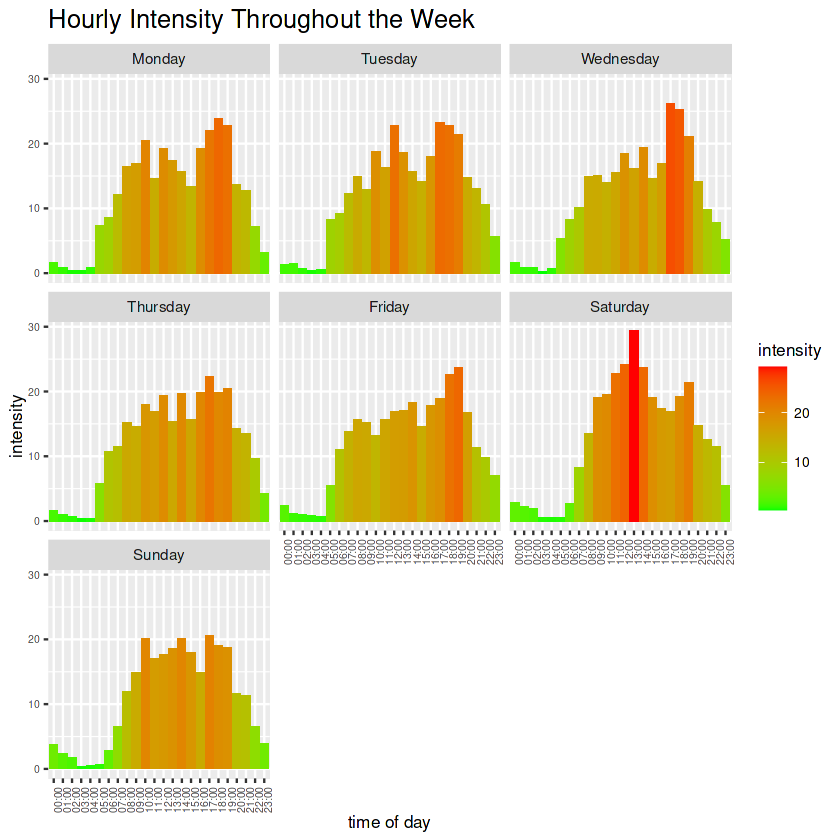

In [25]:
# Creating a data frame to summarise average hourly total intensities by day of the week
intensity_week <- hourly_activity %>% 
  mutate(day = factor(day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>% 
  group_by(time, day) %>% 
  summarise(average_intensity_w = mean(total_intensity), .groups = "drop")
head(intensity_week)

# Plotting the data using a column chart
ggplot(data = intensity_week) + 
  geom_col(mapping = aes(x = time, y = average_intensity_w, fill = average_intensity_w)) +
  facet_wrap(~day) +
  scale_fill_gradient(low = "green", high = "red") +
  labs(x = "time of day", y = "intensity", title = "Hourly Intensity Throughout the Week", fill = "intensity") + 
  theme(axis.text.x = element_text(angle = 90)) +
  theme(axis.text.x = element_text(size = 6), axis.text.y = element_text(size = 6), legend.text = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10), legend.title = element_text(size = 10),
        plot.title = element_text(size = 15))

The patterns for hourly intensities are similar to those observed in the hourly step counts, where higher hourly intensities are more prevalent during specific time periods - early evening between 17:00 to 20:00 on weekdays and early afternoon between 12:00 to 15:00 on Saturdays.

It is also worth highlighting that the notable increase in intensity observed on Saturdays closely mirrors the rise in step counts during this time frame. This finding could be linked to individuals making the most of their free time by engaging in activities that require higher levels of greater physical exertion and movement.

Overall, these hourly patterns - step count and intensities - shed light on the temporal preferences and routines of fitness tracker users on both weekdays and weekends.

## 4.4. Daily Active Minutes

Question: What is the distribution of active minutes for users?

In [26]:
# Creating a data frame to summarise total very active, fairly active and lightly active minutes each week
active_min_week <- daily_activity %>% 
  summarise("very active" = round(mean(very_active_minutes)*7), 
            "fairly active" = round(mean(fairly_active_minutes)*7), 
            "lightly active" = round(mean(lightly_active_minutes)*7), 
            .groups = "drop")
head(active_min_week)

very active,fairly active,lightly active
<dbl>,<dbl>,<dbl>
148,95,1350


Users are very active for 148 minutes, fairly active for 95 minutes and lightly active for 1350 minutes, which makes up the majority of active minutes each week.

As the demographics for the current sample have not been provided, it is assumed that all individuals in the sample are adults.

According to the World Health Organisation, adults between the ages of 18 and 64 are recommended to allocate their weekly physical activity to approximately 150 to 300 minutes of fairly active activity, approximately 75 to 150 minutes of very active activity, or alternatively, a combination of both fairly active and very active activities.

For enhanced health benefits, individuals can either increase their fairly active minutes to more than 300 minutes, increase their very active minutes to more than 150 minutes, or a combination of both per week.

Overall, users engage within the recommended range of very active minutes. Taking into account both very active and fairly active minutes, users not only meet but also exceeded the recommended levels of physical activity, allowing them to potentially gain enhanced health benefits.

day,active_min,minutes
<fct>,<chr>,<dbl>
Monday,very active,23
Tuesday,very active,23
Wednesday,very active,21
Thursday,very active,19
Friday,very active,20
Saturday,very active,22


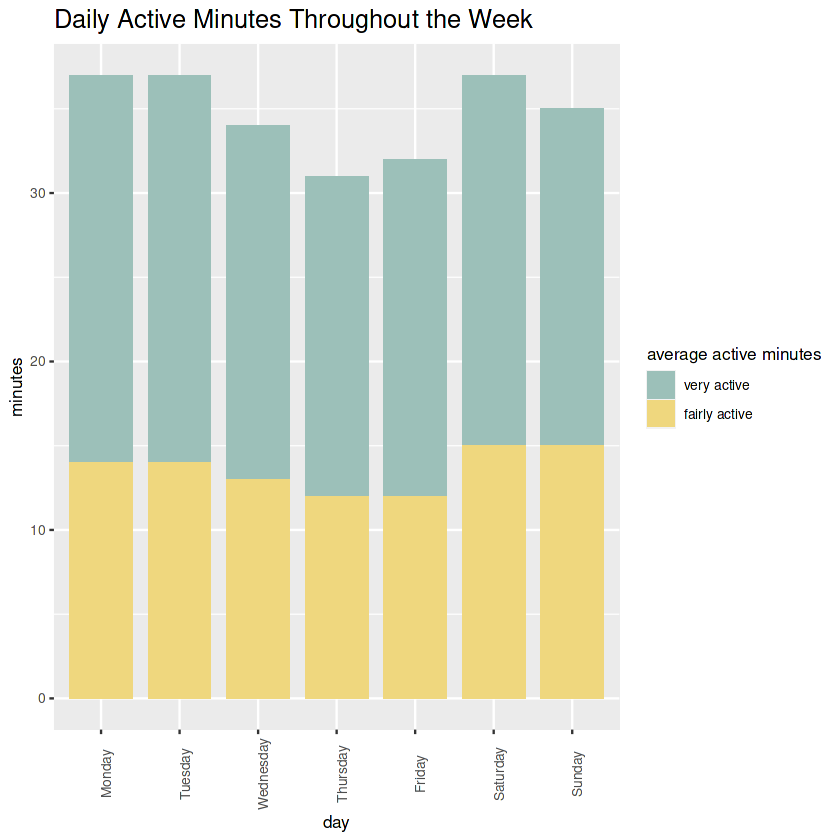

In [27]:
# Creating a data frame to summarise very active and fairly active minutes by day of the week
active_min_day <- daily_activity %>% 
  mutate(day = factor(day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>% 
  group_by(day) %>% 
  summarise("very active" = round(mean(very_active_minutes)), 
            "fairly active" = round(mean(fairly_active_minutes)), 
            .groups = "drop")

# Convert active minutes to long data 
active_min_day <- gather(active_min_day,"active_min","minutes",2:3)     
head(active_min_day)

# Plotting the data using a column chart
ggplot(data = active_min_day) + 
  geom_col(mapping = aes(x = day, 
                         y = minutes, 
                         fill = factor(active_min, levels = c("very active", "fairly active"))), width = 0.8) + 
  scale_fill_manual(values = c("#9cc0b9","#efd77e")) +
  labs(x = "day", y = "minutes", title = "Daily Active Minutes Throughout the Week", fill = "average active minutes") + 
  theme(axis.text.x = element_text(angle = 90)) +
  theme(axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8), legend.text = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10), legend.title = element_text(size = 10),
        plot.title = element_text(size = 15))

When considering only very active and fairly active minutes, we can see that as a whole, users are least active on Thursdays and Fridays, and are most active on Mondays, Tuesdays and Saturdays.

This trend suggests that users' engagement in physical activity fluctuates throughout the week.

## 4.5. Sleep Duration

Question: What is the relationship between sleep duration, step count and sedentary minutes?

Now, I will examine daily variables with user sleeping patterns to assess the influence of step count and sedentary minutes on sleep duration.

This analysis will begin with the merging of the daily activity data and the daily sleep data, followed by analysing the correlations between these variables.

In [28]:
# Merge daily activity and daily sleep data
daily_activity_sleep <- merge(daily_activity, daily_sleep, by = c("id", "date","day")) %>% 
  select(c(-11))  # remove time column

head(daily_activity_sleep)

,id,date,day,calories,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,Tuesday,1985,13162,8.50,25,13,328,728,1,327,346
2,1503960366,2016-04-13,Wednesday,1797,10735,6.97,21,19,217,776,2,384,407
3,1503960366,2016-04-15,Friday,1745,9762,6.28,29,34,209,726,1,412,442
4,1503960366,2016-04-16,Saturday,1863,12669,8.16,36,10,221,773,2,340,367
5,1503960366,2016-04-17,Sunday,1728,9705,6.48,38,20,164,539,1,700,712
6,1503960366,2016-04-19,Tuesday,2035,15506,9.88,50,31,264,775,1,304,320


In [29]:
# Determine the number of unique users and number of observations
n_unique(daily_activity_sleep$id)
nrow(daily_activity_sleep)

[1] 24

[1] 410

As a reminder, it is important to note that given the relatively small sample size of 24 participants, the findings below for sleep data may not be accurate, and thus, should be interpreted with caution.

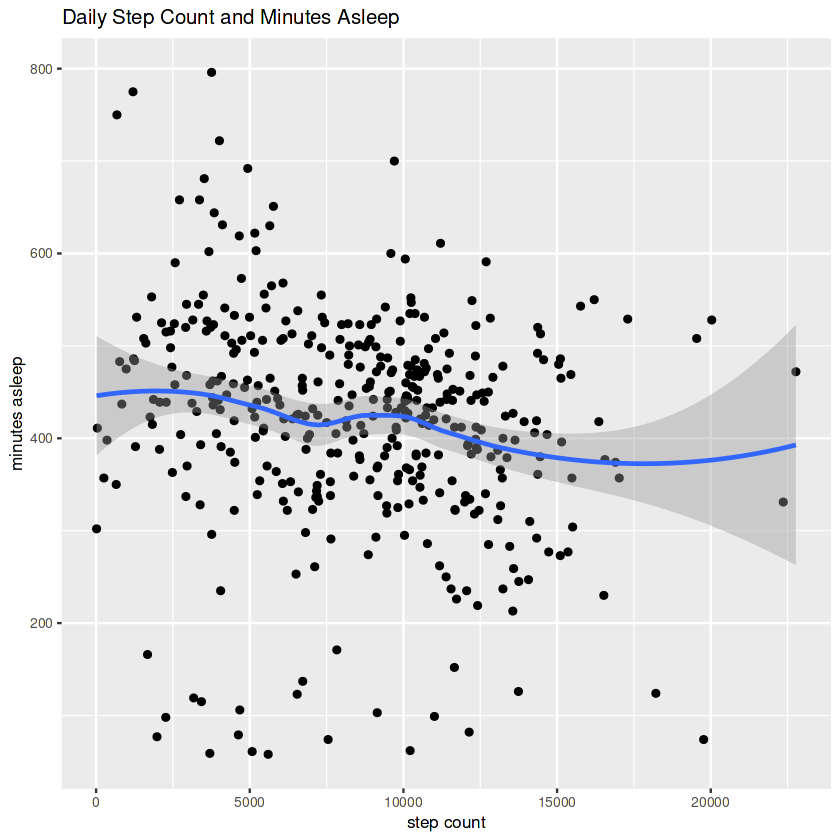

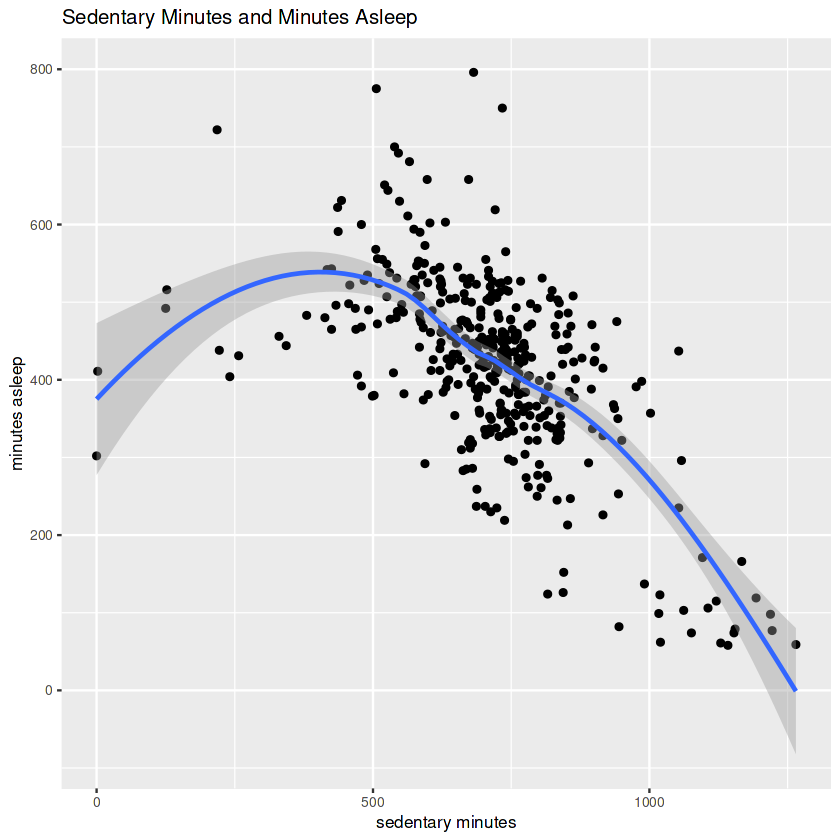

In [30]:
# Correlating total daily steps with minutes asleep and sedentary minutes with minutes asleep
ggplot(data = daily_activity_sleep, aes(x = total_steps, y = total_minutes_asleep)) + 
    geom_point() +
    geom_smooth(method = "loess", formula = "y ~ x") +
    labs(x = "step count", y = "minutes asleep", title = "Daily Step Count and Minutes Asleep") +
    theme(axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10),
        plot.title = element_text(size = 12))

ggplot(data = daily_activity_sleep, aes(x = sedentary_minutes, y = total_minutes_asleep)) + 
    geom_point() +
    geom_smooth(method = "loess", formula = "y ~ x") +
    labs(x = "sedentary minutes", y = "minutes asleep", title = "Sedentary Minutes and Minutes Asleep") + 
    theme(axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10),
        plot.title = element_text(size = 12))

From the scatter plots and trend lines, we can see:

- there is no correlation between step count and minutes asleep.

- there is a negative correlation between sedentary minutes and minutes asleep, suggesting that increased sedentary time may lead to reduced sleep duration.

Given the negative correlation between sedentary minutes and sleep duration, this may indicate that reducing sedentary time could result in increased sleep duration. However, this does not ensure improved sleep quality. Hence, further research is required to establish a more comprehensive understanding of the relationships.

Now, let's take a look at sleep duration by day of the week to investigate users' sleeping patterns.

day,minutes_asleep
<fct>,<dbl>
Monday,419.5000
Tuesday,404.5385
Wednesday,434.6818
Thursday,401.2969
Friday,405.4211
Saturday,419.0702


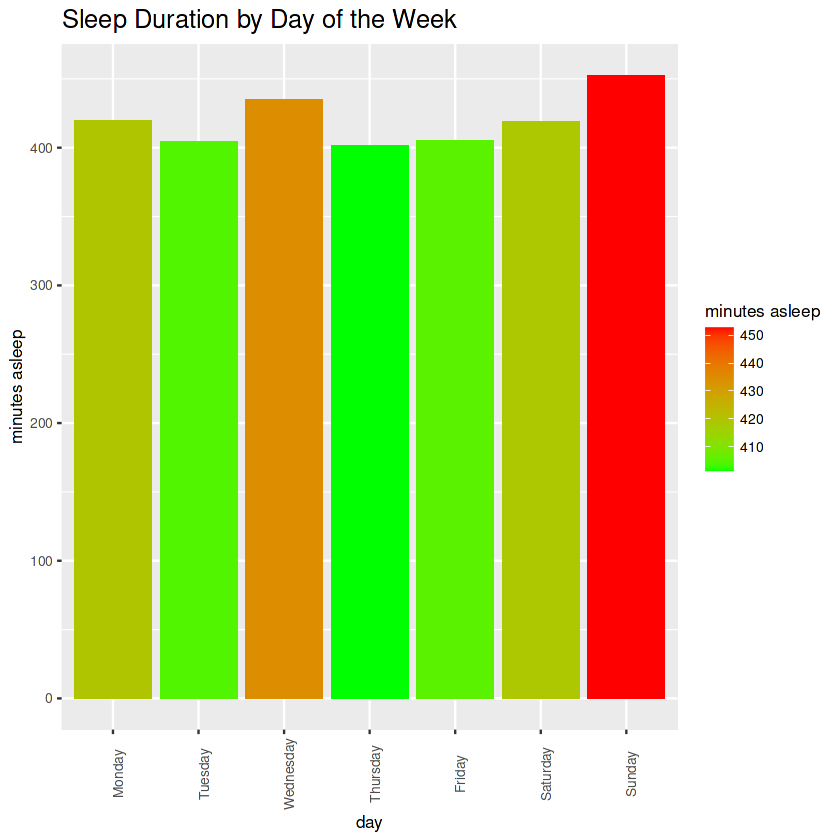

In [31]:
# Creating a data frame to summarise minutes asleep by day of the week 
activity_sleep_week <- daily_activity_sleep %>% 
  mutate(day = factor(day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>% 
  group_by(day) %>% 
  summarize(minutes_asleep = mean(total_minutes_asleep), .groups = "drop")
head(activity_sleep_week)

# Plotting the data on a column chart
ggplot(data = activity_sleep_week) + 
  geom_col(mapping = aes(x = day, y = minutes_asleep, fill = minutes_asleep)) +
  scale_fill_gradient(low = "green", high = "red") +
  labs(x = "day", y = "minutes asleep", title = "Sleep Duration by Day of the Week", fill = "minutes asleep") + 
  theme(axis.text.x = element_text(angle = 90)) +
  theme(axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8), legend.text = element_text(size = 8),
        axis.title.x = element_text(size = 10), axis.title.y = element_text(size = 10), legend.title = element_text(size = 10),
        plot.title = element_text(size = 15))

The column chart illustrates that, on average:

- the shortest sleep duration, approximately 6.7 hours, occurs on Thursdays.

- the longest sleep duration, approximately 7.5 hours, occurs on Sundays. This observation is in line with the belief that Sundays are typically considered as a day of rest, giving users the opportunity to recharge and catch up on sleep by extending their sleep duration.

# 5. Share Phase
## Conclusion
With the goal of empowering women by providing insights into their health and lifestyle habits, Bellabeat aims to examine trends in non-Bellabeat smart devices to inform its own marketing strategies to further inspire women around the world.

In the present analysis, several insights have been uncovered that may aid in shaping Bellabeat’s marketing strategy for the Bellabeat app. 

Despite these findings, to obtain a more reliable understanding of its users, Bellabeat should aim to examine its own data in future analyses. This recommendation is owed to the small sample size, constrained analyses and lack of demographic information in the current sample, which may potentially introduce biases and result in inaccurate insights. For instance, while Bellabeat's target audience is mainly women, it is important to acknowledge that the sample used in this analysis is assumed to include both men and women.

## Recommendations
### 1. Reminder notifications and informative articles
#### Step count
A Centers for Disease Control and Prevention (CDC) study found that walking 8000 steps daily reduced the risk of mortality by 51% compared to walking 4000 steps, while walking 12000 steps lowered the risk by 65%. This suggests that increasing daily step count to a minimum of 8000 steps may potentially be beneficial to overall health. In the present analysis, users averaged 7638 steps per day, which is slightly below the proposed 8000 steps. 

*Recommendation*: The Bellabeat application could introduce articles to educate users on the benefits of walking to overall health and implement notifications to remind users to achieve a daily step target of 8000 steps. Users could also be given the option to set personalised step challenges, allowing them to increase their daily step targets according to their own capabilities and preferences.

Given that the peak hourly step counts and intensity levels tend to occur between 5 pm and 8 pm on weekdays and between 12 pm to 3 pm on Saturdays, the Bellabeat application could send users reminders to engage in physical activity during these time frames.

#### Active minutes 
It was also observed that the sample exceeded the recommended combined range of very active and fairly active minutes. Nevertheless, users can be encouraged to maintain these enhanced health benefits by continuing their current habits.

*Recommendation*: Articles could be introduced to educate users on the benefits of reaching or exceeding the recommended range of weekly very active and/or fairly active minutes and users could be given the flexibility to set customisable daily and weekly active minutes targets according to their own capabilities and daily schedules. Additionally, reminder notifications can be incorporated to motivate users to reach their targets.  

#### Sleep duration
Although the recommended daily sleep duration is between 7 and 9 hours, users in the sample typically sleep around 7 hours, which falls at the lower end of the range. 

*Recommendation*: Users would be able to customize their sleep schedules within the Bellabeat application by specifying their preferred sleep and wake times. If the selected timeframe does not align with the recommended 7 to 9 hours of sleep, users will be alerted. Additionally, users can set notifications to remind them that their sleep schedule is approaching, prompting them to prepare for bedtime.

#### Inconsistent use
The daily and hourly activity datasets have more participants than the daily sleep dataset. This discrepancy could perhaps be due to users wearing their smart devices during the day to track their daily activities, but not at night to track their sleep.

*Recommendation*: The Bellabeat application could provide articles aimed at educating users on the benefits of adequate sleep and inform users that tracking their sleep and daily activities may allow them to obtain a more holistic understanding of their health and lifestyle habits. The application could also encourage users to track both daily activities and sleep by sending reminder notifications to wear their devices when not in use.

### 2. Support networks, challenges and rewards
Recommendation: Support networks, challenges and rewards can be included in the Bellabeat application. Users can invite friends and join communities to form support networks to make their fitness journey enjoyable and interactive. Within these networks, users would be able to motivate each other to achieve their personal goals, share their progress and experiences, and set shared fitness goals. Furthermore, Bellabeat can organise challenges for users, encouraging them to accomplish specific fitness goals. Users who successfully complete these challenges will earn badges or rewards, which serve as incentives to encourage users to take part in the challenges.  

By including these social and incentivising elements into the fitness experience, the Bellabeat application can create a supportive and engaging platform for users to improve their health. 

# Thank You!
Thank you for reading my Bellabeat Fitness Tracker case study! This is my first data analysis project using R and I hope you liked it :)